# COMPLETE MODEL BUILDING WITH NLP

# IMPORTING REQUIRED LIBBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [69]:
df=pd.read_csv("combined.csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Reveiw,Rating
0,0,0,Don't go for this mobile as I face issue with ...,1
1,1,1,The phone looks very good and premium but I no...,1
2,2,2,Redmi note 9 pro mobile after purchasing 2 day...,1
3,3,3,The phone is not supporting any kind of SD car...,1
4,4,4,"Not good,\nHang and some time show error many ...",1


In [70]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,Reveiw,Rating
20940,20940,4393,Good battery life.\nAccurate sleep monitoring\...,5
20941,20941,4394,The product is having amazing and suoerb featu...,5
20942,20942,4395,NaN,5
20943,20943,4396,"I'm so excited for this Smart Watch, the best ...",5
20944,20944,4397,The watch is very handy and also the features ...,5


In [72]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Reveiw', 'Rating'], dtype='object')

In [73]:
df.shape

(20945, 4)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20945 entries, 0 to 20944
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20945 non-null  int64 
 1   Unnamed: 0.1  20945 non-null  int64 
 2   Reveiw        20775 non-null  object
 3   Rating        20945 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 654.7+ KB


In [4]:
df.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

In [5]:
df.head()

,Reveiw,Rating
0,Don't go for this mobile as I face issue with ...,1
1,The phone looks very good and premium but I no...,1
2,Redmi note 9 pro mobile after purchasing 2 day...,1
3,The phone is not supporting any kind of SD car...,1
4,"Not good,\nHang and some time show error many ...",1


In [6]:
df.shape

(20945, 2)

# Null value check

<AxesSubplot:>

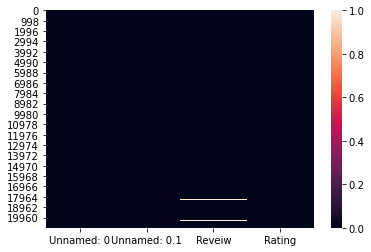

In [76]:
sns.heatmap(df.isnull())

In [75]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
Reveiw          170
Rating            0
dtype: int64

In [77]:
df.dropna(inplace=True)

In [78]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Reveiw          0
Rating          0
dtype: int64

In [7]:
df['Rating'].value_counts()

5    5161
4    4506
1    4375
3    3807
2    3096
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

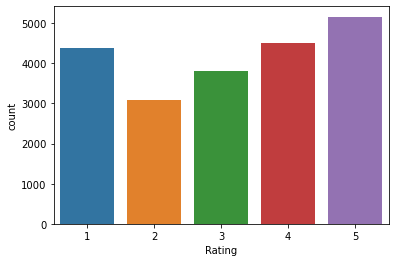

In [8]:
sns.countplot(df['Rating'])

In [9]:
# Creating a new Column 
df['length'] = df['Reveiw'].str.len()

In [10]:
df.head()

,Reveiw,Rating,length
0,Don't go for this mobile as I face issue with ...,1,591.0
1,The phone looks very good and premium but I no...,1,167.0
2,Redmi note 9 pro mobile after purchasing 2 day...,1,123.0
3,The phone is not supporting any kind of SD car...,1,270.0
4,"Not good,\nHang and some time show error many ...",1,108.0


In [11]:
# since machine learning algorithms are case sensitive we are convering everything to lower

df['Reveiw'] = df['Reveiw'].str.lower()

In [12]:
df.head()

,Reveiw,Rating,length
0,don't go for this mobile as i face issue with ...,1,591.0
1,the phone looks very good and premium but i no...,1,167.0
2,redmi note 9 pro mobile after purchasing 2 day...,1,123.0
3,the phone is not supporting any kind of sd car...,1,270.0
4,"not good,\nhang and some time show error many ...",1,108.0


# Removing Regular Expressions Preprocessing

In [13]:
df['Reveiw'] = df['Reveiw'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

df['Reveiw'] = df['Reveiw'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

df['Reveiw'] = df['Reveiw'].str.replace(r'£|\$','dollers')

df['Reveiw'] = df['Reveiw'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

df['Reveiw'] = df['Reveiw'].str.replace(r'\d+(\.\d+)?','numbr')

df['Reveiw'] = df['Reveiw'].str.replace(r'[^\w\d\s]',' ')

df['Reveiw'] = df['Reveiw'].str.replace(r'^\s+|\s+?$','')

In [16]:
print(df)

                                                  Reveiw  Rating  length
0      don t go for this mobile as i face issue with ...       0   591.0
1      the phone looks very good and premium but i no...       0   167.0
2      redmi note numbr pro mobile after purchasing n...       0   123.0
3      the phone is not supporting any kind of sd car...       0   270.0
4      not good \nhang and some time show error many ...       0   108.0
5      this mobile showing numbrgb free ram only out ...       0    90.0
6      display quality very very poor   edges you can...       0   578.0
7              very bad quality heating charge very much       0    41.0
8      incoming receiver voice call  has corrupted wi...       0   483.0
9      touch screen in many spots not responding whil...       0    55.0
10     please stop using this phone  this is my exper...       0   364.0
11     please don t buy   worst front camera and freq...       0  1056.0
12     xiaomi phone quality is detorerating gradual

# removing stopwords

In [18]:
import string
from nltk.corpus import stopwords

In [19]:
stop_words = set(stopwords.words('english')+['4','2','u','ur','im','dont','doin','ure'])
df['Reveiw'] = df['Reveiw'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [20]:
df['clean length'] = df['Reveiw'].str.len()

In [21]:
df.head()

,Reveiw,Rating,length,clean length
0,go mobile face issue network signal numbrdays ...,1,591.0,324
1,phone looks good premium noticed lags camera i...,1,167.0,105
2,redmi note numbr pro mobile purchasing numbr d...,1,123.0,121
3,phone supporting kind sd card always asking fo...,1,270.0,208
4,good hang time show error many times every app...,1,108.0,76


In [22]:
print('the original length is ',sum(df['length']))
print('the clean length is ',sum(df['clean length']))

the original length is  4908503.0
the clean length is  3413829


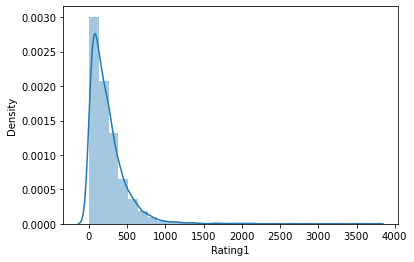

In [23]:
sns.distplot(df[df['Rating']==1]['length'],bins=29)
plt.xlabel("Rating1")

plt.show()


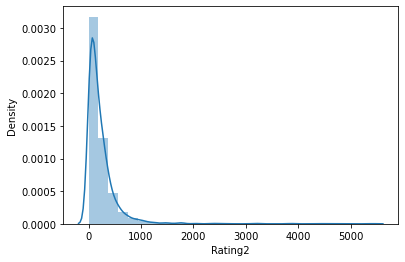

In [24]:
sns.distplot(df[df['Rating']==2]['length'],bins=29)
plt.xlabel("Rating2")

plt.show()

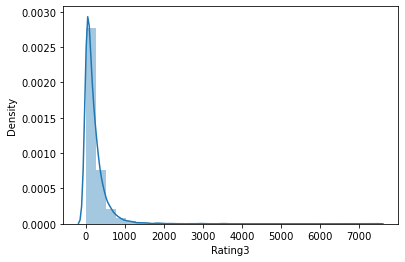

In [25]:
sns.distplot(df[df['Rating']==3]['length'],bins=29)
plt.xlabel("Rating3")

plt.show()


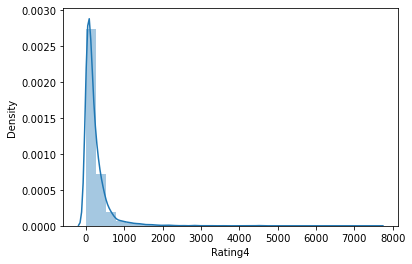

In [26]:
sns.distplot(df[df['Rating']==4]['length'],bins=29)
plt.xlabel("Rating4")

plt.show()

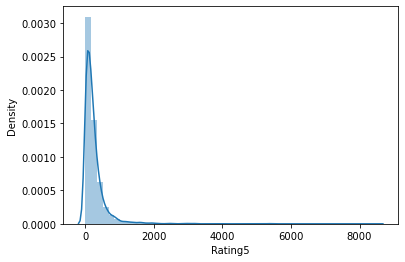

In [29]:
sns.distplot(df[df['Rating']==5]['length'])
plt.xlabel("Rating5")

plt.show()

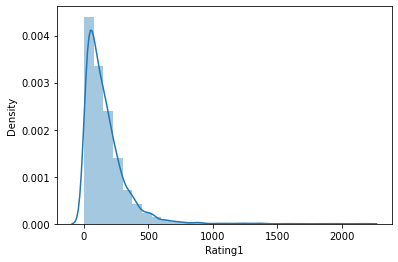

In [68]:
sns.distplot(df[df['Rating']==1]['clean length'],bins=29)
plt.xlabel("Rating1")

plt.show()


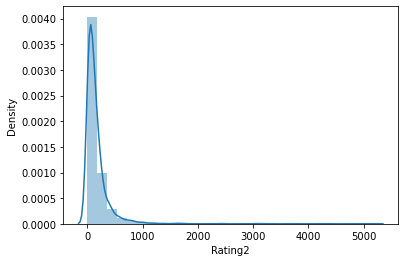

In [33]:
sns.distplot(df[df['Rating']==2]['clean length 2'],bins=29)
plt.xlabel("Rating2")

plt.show()


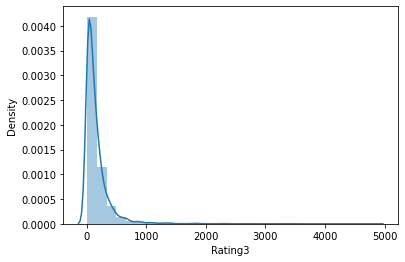

In [34]:
sns.distplot(df[df['Rating']==3]['clean length'],bins=29)
plt.xlabel("Rating3")

plt.show()


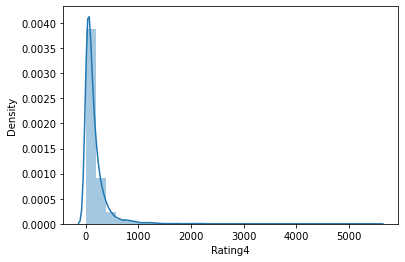

In [35]:
sns.distplot(df[df['Rating']==4]['clean length'],bins=29)
plt.xlabel("Rating4")

plt.show()


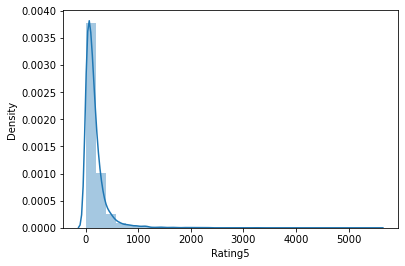

In [36]:
sns.distplot(df[df['Rating']==5]['clean length'],bins=29)
plt.xlabel("Rating5")

plt.show()


In [40]:
from wordcloud import WordCloud

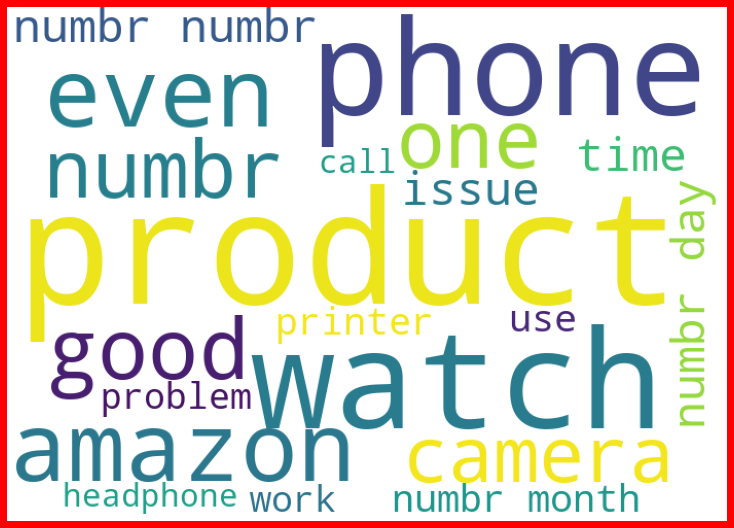

In [41]:
spams = df['Reveiw'][df['Rating']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')

plt.imshow(spam_cloud) 

plt.axis('off')

plt.tight_layout(pad=0)

plt.show()

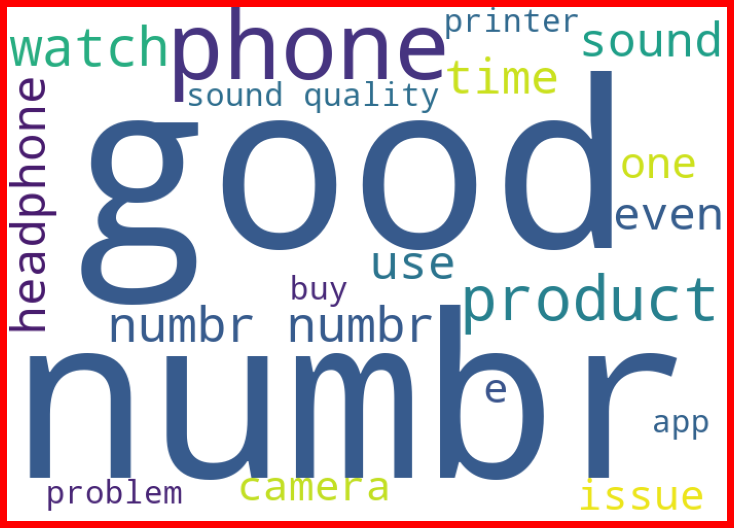

In [42]:

spams = df['Reveiw'][df['Rating']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')

plt.imshow(spam_cloud) 

plt.axis('off')

plt.tight_layout(pad=0)

plt.show()

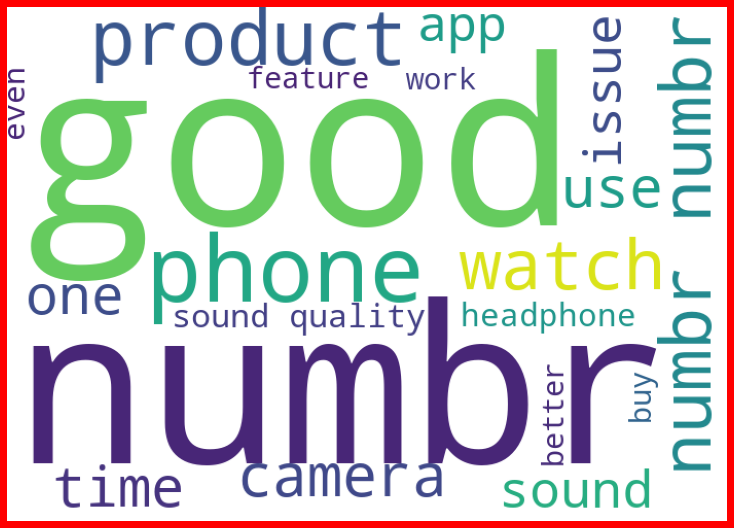

In [43]:

spams = df['Reveiw'][df['Rating']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')

plt.imshow(spam_cloud) 

plt.axis('off')

plt.tight_layout(pad=0)

plt.show()

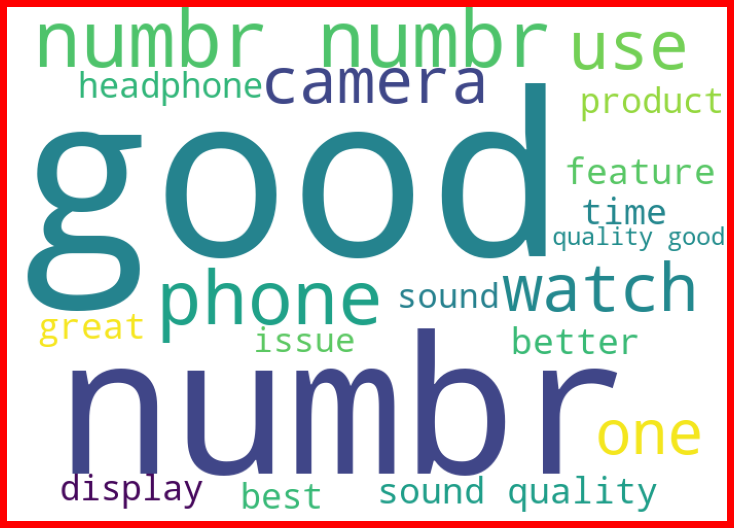

In [44]:

spams = df['Reveiw'][df['Rating']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')

plt.imshow(spam_cloud) 

plt.axis('off')

plt.tight_layout(pad=0)

plt.show()

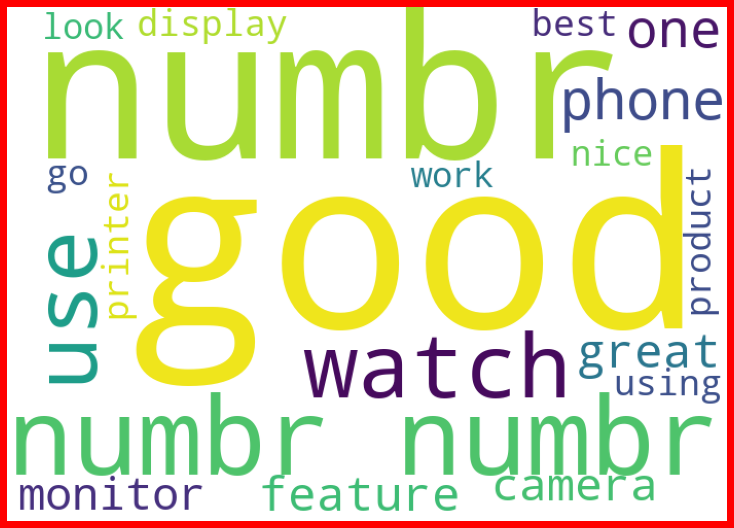

In [45]:

spams = df['Reveiw'][df['Rating']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')

plt.imshow(spam_cloud) 

plt.axis('off')

plt.tight_layout(pad=0)

plt.show()

In [46]:
# 1. Convert text into vectors using TF-IDF

# 2. Instantiate MuttinomiaLNB cLasstfier

# 3. SpLit feature and LabeL

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(df['Reveiw'])

x = features

y = df['Rating']

In [47]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [48]:
algo = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier()]
result = pd.DataFrame(columns=["Algorithm Name","Accuracy Score","Cross Validation Score"])

lg =[]
dtc=[]
knc=[]
rfc=[]
abc=[]


fl = [lg,dtc,knc,rfc,abc]


oo=0
for i in algo:
    rand=0
    acc=0
    
    
    
    for ii in range(40,45):
        train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=.20,random_state=ii)
        cf = i
        cf.fit(train_x,train_y)
        pred = cf.predict(test_x)
        ac = accuracy_score(test_y,pred)
        if ac>acc:
            acc=ac
            rand=ii
    print(f' the best random state is {rand}  for algorithm {i}')
    
    
    train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=.20,random_state=rand)
    cf = i
    cf.fit(train_x,train_y)
    pred = cf.predict(test_x)
    ac = accuracy_score(test_y,pred)
    cv = cross_val_score(cf,x,y,cv=5).mean()
    fl[oo].insert(0,i)
    fl[oo].insert(1,ac)
    fl[oo].insert(2,cv)
    result.loc[oo] = fl[oo]
    oo +=1
    
    
final_result = result.sort_values(by=["Accuracy Score","Cross Validation Score"],ascending=False)  

 the best random state is 42  for algorithm DecisionTreeClassifier()
 the best random state is 44  for algorithm KNeighborsClassifier()
 the best random state is 41  for algorithm RandomForestClassifier()
 the best random state is 40  for algorithm AdaBoostClassifier()


In [49]:
final_result

,Algorithm Name,Accuracy Score,Cross Validation Score
2,"(DecisionTreeClassifier(max_features='auto', r...",0.465223,0.434609
3,"(DecisionTreeClassifier(max_depth=1, random_st...",0.440915,0.415211
0,DecisionTreeClassifier(),0.369916,0.356679
1,KNeighborsClassifier(),0.240915,0.216366


In [50]:
final_result['Algorithm Name'][2]

RandomForestClassifier()

In [53]:
# Train and predict

naive = MultinomialNB()
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)
naive.fit(x_train,y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.44012321909896035


# HyperParameter Tunining

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
rf = RandomForestClassifier()
parameters = {'bootstrap': [True, False],
 'max_depth': [10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'n_estimators': [50,100]}
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=.20,random_state=41)
gsv = GridSearchCV(rf,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100]})

In [58]:
gsv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [61]:
rf = RandomForestClassifier(bootstrap=False,max_depth=None,max_features='auto',min_samples_leaf=2,n_estimators=100)
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=.20,random_state=47)
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(rf,x,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} ' )

 the accuracy socre is 0.46594464500601684, the cross validation score is 0.43927797833935023 


# THE ACCURACY SOCRE IS 46% AND CROSS VALIDATION SCORE IS 44%

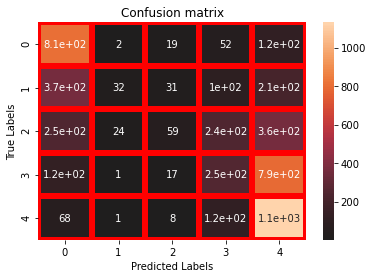

In [63]:
# pLot confusion matrix heatmap

conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()
sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion matrix')


plt.show()

In [64]:
conf_mat

array([[ 812,    2,   19,   52,  121],
       [ 367,   32,   31,  101,  209],
       [ 248,   24,   59,  241,  364],
       [ 125,    1,   17,  252,  792],
       [  68,    1,    8,  117, 1131]], dtype=int64)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.81      0.62      1006
           2       0.53      0.04      0.08       740
           3       0.44      0.06      0.11       936
           4       0.33      0.21      0.26      1187
           5       0.43      0.85      0.57      1325

    accuracy                           0.44      5194
   macro avg       0.45      0.40      0.33      5194
weighted avg       0.44      0.44      0.36      5194



# Saving the model

In [66]:
import joblib
joblib.dump(rf,"NLP for Rating.pkl")

['NLP for Rating.pkl']